In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
gb_model = GradientBoostingClassifier()

In [12]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5]
}

In [13]:
grid = GridSearchCV(gb_model, param_grid)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [16]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [17]:
predictions = grid.predict(X_test)

In [18]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [19]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



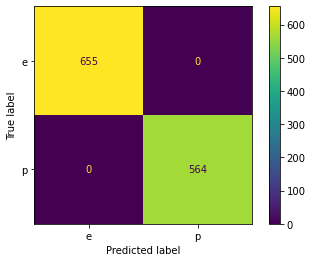

In [21]:
plot_confusion_matrix(grid, X_test, y_test)

In [23]:
# grid.best_estimator_.feature_importances_

In [24]:
feat_import = grid.best_estimator_.feature_importances_

In [25]:
imp_feat = pd.DataFrame(index=X.columns, data=feat_import, columns=['Importance'])

In [40]:
imp_feat = imp_feat.sort_values(by='Importance')

In [41]:
imp_feat = imp_feat[imp_feat['Importance'] > 0.0005]

In [42]:
imp_feat

,Importance
population_v,0.000509
population_y,0.000591
odor_c,0.000624
ring-type_p,0.000661
cap-surface_g,0.001049
ring-number_o,0.001111
ring-number_t,0.001144
stalk-surface-above-ring_k,0.001822
stalk-surface-above-ring_s,0.001998
cap-color_y,0.002311


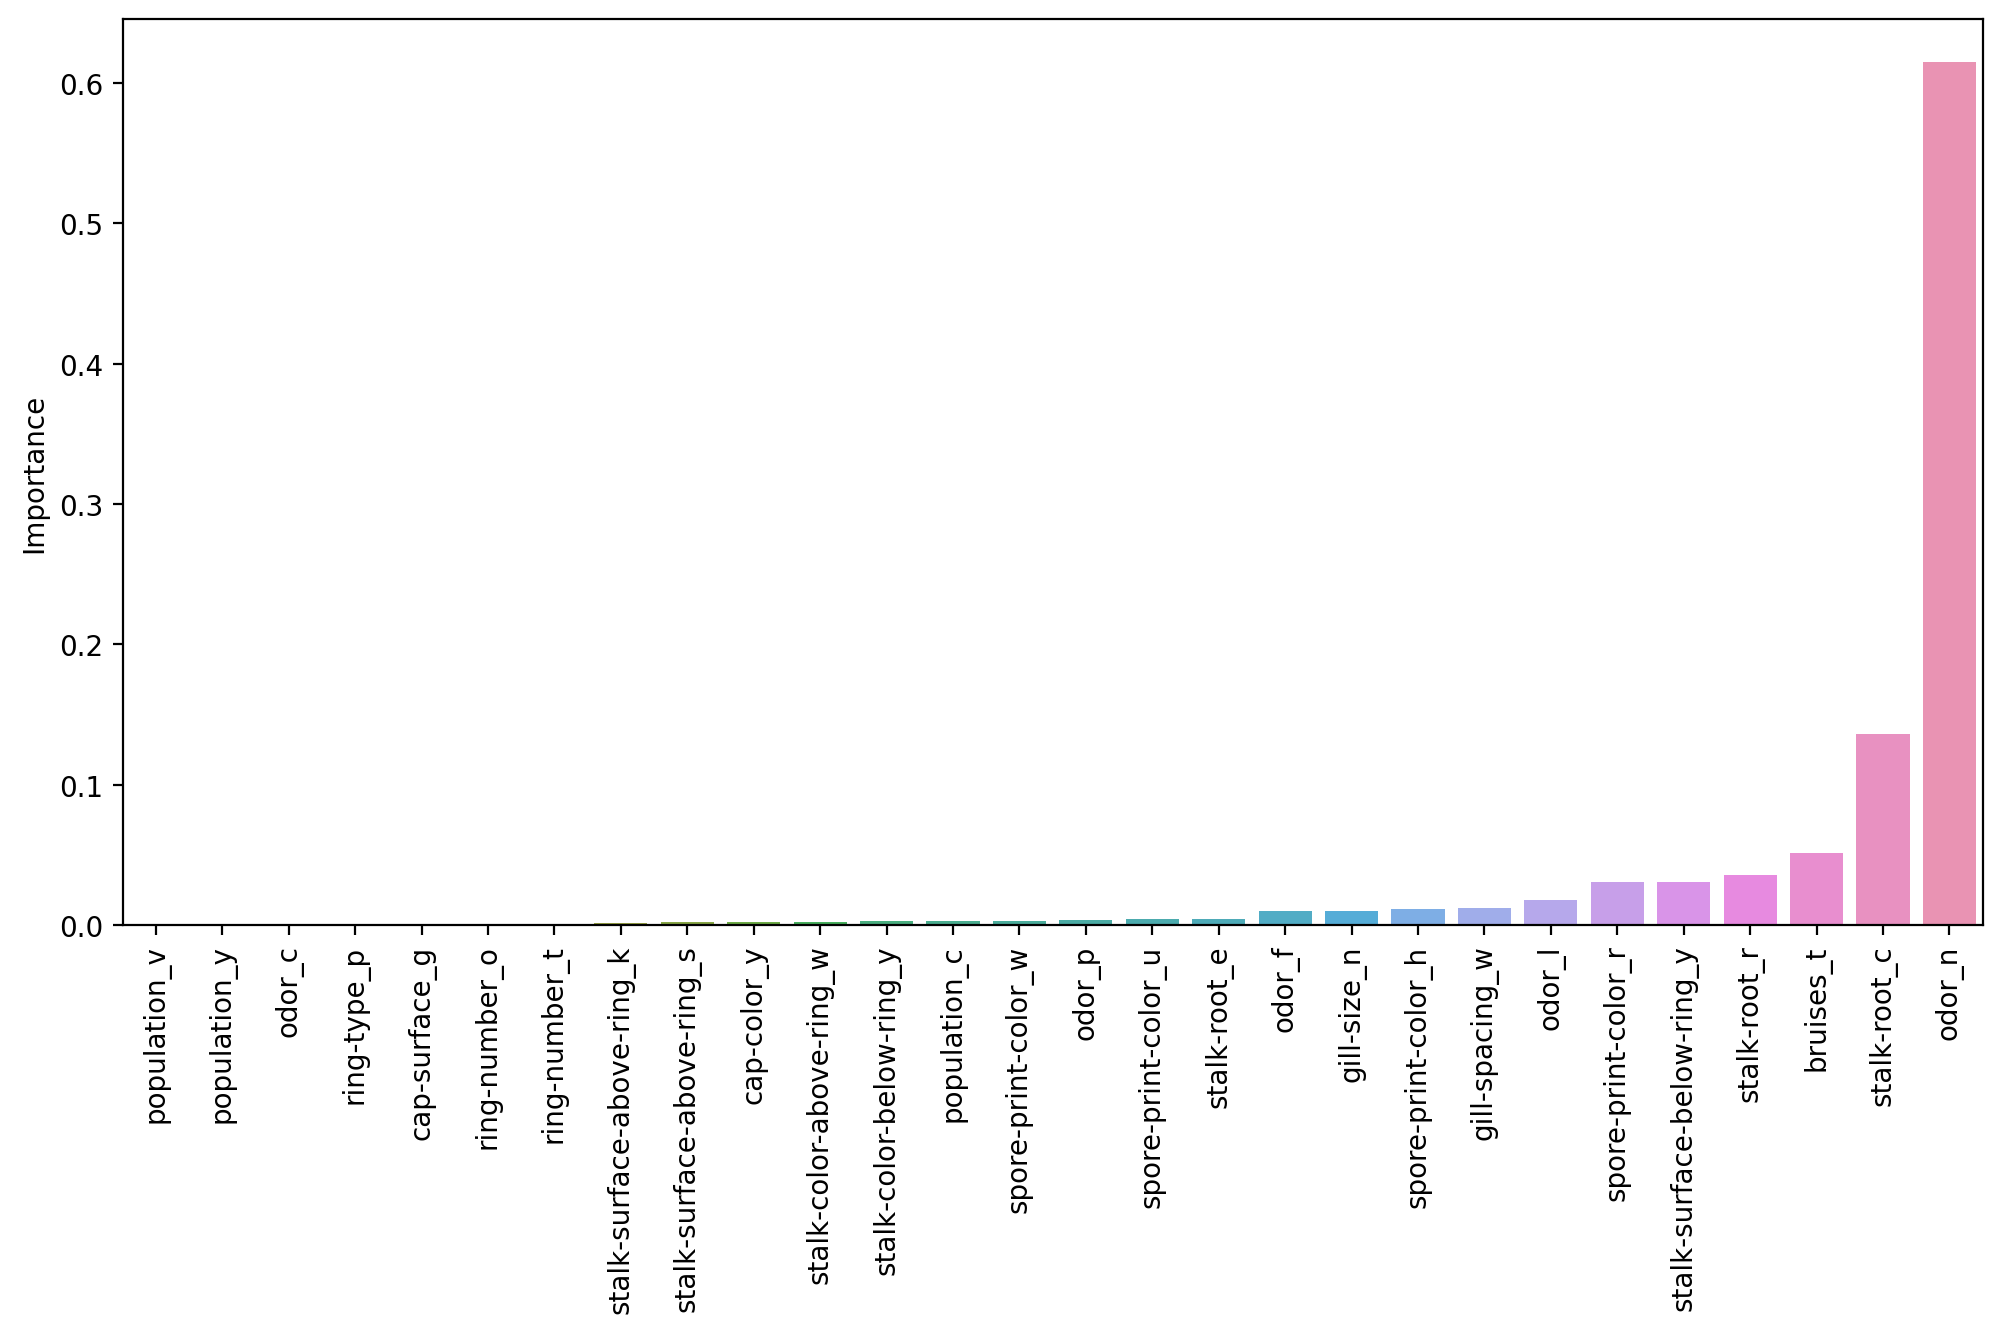

In [43]:
plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')

plt.xticks(rotation=90);